In [5]:
#importing required packages
from math import exp
import csv
import matplotlib.pyplot as plt

In [6]:
def neural_network(input_val,exp_out,l_rate,network):#forward propagation
    z1_temp = network[0][0] * input_val
    z2_temp = network[0][1] * input_val
    z1 = 1.0/(1.0+exp(-z1_temp))
    z2 = 1.0/(1.0+exp(-z2_temp))
    y = z1 * network[1][0] + z2 * network[1][1]
    #calculating error
    exp_list.append(exp_out)
    out_list.append(y)
    error_y = exp_out - y
    error_z1 = error_y * network[1][0]
    error_z2 = error_y * network[1][1]
    #calculating deltas
    delta_1 = -error_y * z1
    delta_2 = -error_y * z2
    delta_11 = -error_z1 * input_val
    delta_12 = -error_z2 * input_val
    #updating weights
    temp = network
    network[0][0] = temp[0][0] - (l_rate)*(delta_11)
    network[0][1] = temp[0][1] - (l_rate)*(delta_12)
    network[1][0] = temp[1][0] - (l_rate)*(delta_1)
    network[1][1] = temp[1][1] - (l_rate)*(delta_2)

In [19]:
#establishing network
exp_list=list()
out_list=list()
network = list()
hidden_layer = [1,2]
output_layer = [3,4]
network.append(hidden_layer)
network.append(output_layer)

In [20]:
#reading the given file and calling the neural network
with open('inputHW5.csv') as f:
    reader = csv.reader(f)
    dataset = list(reader)
input_vals=list()
output_vals=list()
for row in dataset:
    input_vals.append(float(row[0]))
    output_vals.append(float(row[-1]))
for i in range(len(output_vals)):
    neural_network(input_vals[i],output_vals[i],0.001,network)#input_value, output_value, learning_rate01

In [15]:
#network after passing the dataset
network

[[17.26783836888609, 38.41957445474712],
 [1.9626363415923411, 2.950563658407659]]

In [16]:
#Establishing the Number of inputs
axis = [i for i in range (len(input_vals))]

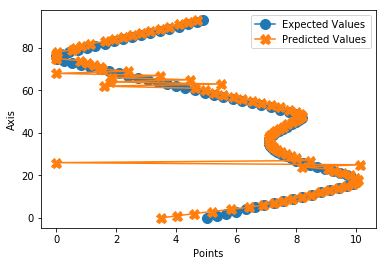

In [17]:
plt.plot(exp_list,axis,marker='o', ms=10, label='Expected Values')
plt.plot(out_list,axis,marker='X', ms=10, label='Predicted Values')
plt.xlabel('Points')
plt.ylabel('Axis')
plt.legend()

In [18]:
#Calculating the accuracy of the prediction
from sklearn import metrics
print(metrics.mean_squared_error(exp_list,out_list))

1.0806244532751452
